# Etude émergétique 


Ce programme a pour but de permettre de **modéliser des écosystèmes**, et notamment les **flux et ressources énergétiques** présents.  
Cela permettra dans un second temps d'étudier la mise en place dans un écosystème d'un appareil de mesure ou de prélèvement énergétique, de façon à avoir un impact le plus faible possible sur l'écosystème.

Stage encadré par 
* Benjamin Pillot
* Guillaume Guimbretière

pour [Grenoble INP - ENSE3](www.ense3.com)  
pour [CNRS](www.cnrs.fr)  
pour [IRD](www.ird.fr)

## Partie I - Les minimodèles

Dans cette première partie, l'objectif est réaliser différents modèles simples, permettant de représenter différents comportements. Ces modèles seront ensuite associés dans la suite, afin de représenter des systèmes complexes combinant plusieurs éléments.

Les minimodèles construits ici sont inspirés des minimodèles construits par Odum et al. dans *Modelling for All Scales*.
Seront donnés pour chaque minimodèle les schémas explicatifs, les équations, les explications des constantes, ainsi que les exemples d'éléments qui suivent ces comportements. 

In [305]:
# Import packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Matplotlib settings
#plt.rcParams['figure.figsize'] = [10, 7]
plt.rcParams['figure.dpi'] = 120

###  I.I Modèles de production et de recyclage

Ces modèles décrivent les process de production et de consommation, sous les actions de sources d'énergie et sous réserve de disponibilité de matériaux

##### NETPROD (Net prodution)

Ce modèle simule la production nette d'un élément, c'est-à-dire la différence entre la consommation et la production brute.
Par exemple, la photosynthèse d'un plante produit de la matière organique. En même temps, cette matière organique est consommée par la plante au cours de la respiration, et par la faune.  
Dans cet exemple, la production est proportionnelle au flux énergétique entrant, dans cet exemple solaire.  
La taux de croissance peut-être calculé sur le terrain en observant l'évolution de la plante au cours du temps.

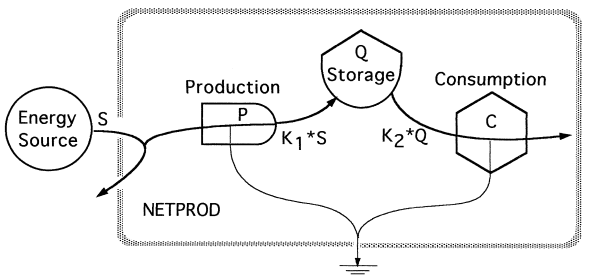

In [306]:
#Définition de la plage temporelle
T0 = 0
T = T0
dT = 1
Tf = 365

In [307]:
#Définition des conditions intiales
Q0 = .1 #stock initial
Q = Q0
S0 = 10 #énergie source initale
S = S0

#Définition des constantes
K1 = .0225
K2 = .09

In [308]:
#Définition des matrices qui vont stocker les valeurs au cours de la boucle de calcul, afin de pouvoir tracer les graphes.
npt = np.array([T]) #temps
npq = np.array([Q]) #stock
nps = np.array([S]) #énergie source

In [309]:
#Boucle de calcul

while T < Tf :
    P = K1*S #production
    C = K2*Q #consommation
    dQ = P - C
    Q += dQ
    T += dT 
    #on incrémente les nouvelles valeurs dans les matrices
    npt = np.append(npt,T)
    npq = np.append(npq,Q)
    nps = np.append(nps,S)
    

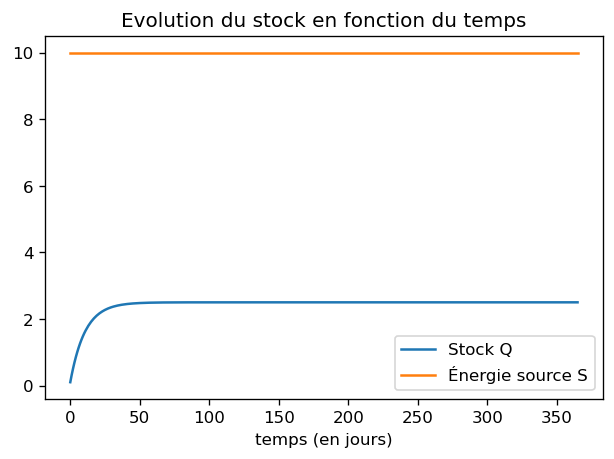

In [310]:
#Tracé des graphes
plt.plot(npt,npq,label = "Stock Q")
plt.plot(npt,nps,label = "Énergie source S")
plt.legend(loc="lower right")
plt.xlabel("temps (en jours)")
plt.title("Evolution du stock en fonction du temps")
plt.show()

On peut ainsi observer l'évolution du stock en fonction du temps. Sur le même graphe est représentée les variations de l'énergie source incidente, afin de voir les changements dans l'évolution du stock que ces variations causent.

**Exemples de cas auxquels le modèle s'applique**  
La production et la consommation sont la base de tout système environnemental, que ce soit des étangs, rivières, forêts, champs ou océans. On peut également imaginer des correspondances avec des modèles économiques basiques.

**________________________________________**

##### FACTORS (External Limiting Factors)

Ce modèle simule la production d'un élement, en la liant à la disponiblité de matériaux extérieurs disponibles.
Par exemple, la photosynthèse est rendue possible par un flux énrgétique, solaire, mais nécessite également la disponibilité de nutrients, par exemple apportés par la pluie. Ces matériaux (nutriments) sont donc apportés via un flux dans un stockage (sol, avec une concentration). L'approvisionnement en ces nutriments va pouvoir limiter la croissance en cas de non-suffisance.  
Ici on n'étudie pas l'évolution d'un stock, mais la variation de la production P.

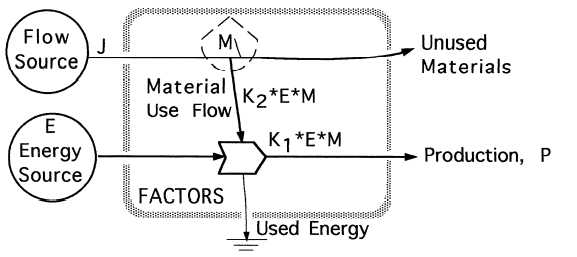

In [311]:
#Définition de la plage temporelle
T0 = 0
T = T0
dT = 1
Tf = 100

In [312]:
#Définition des conditions intiales
P0 = 1 #production initiale
P = P0
E0 = 2 #énergie source initale
E = E0
J0 = 5 #flux de matériaux initial
J = J0
M0 = 1 #concentration en matériaux initiale
M = M0

#Définition des constantes
K1 = .08
K2 = .01

In [313]:
#Définition des matrices qui vont stocker les valeurs au cours de la boucle de calcul, afin de pouvoir tracer les graphes.
npt = np.array([T]) #temps
npp = np.array([P]) #production
npe = np.array([E]) #énergie source
npj = np.array([J]) #flux de matériaux
npm = np.array([M]) #concentration en matériaux

In [314]:
#Boucle de calcul

while T < Tf :
    M = J - K2*E*M #concentration en matériaux
    P = K1*E*M #production, dépendante de l'énergie source et de la concentration en matériaux
    E += 2
    T += dT 
    #on incrémente les nouvelles valeurs dans les matrices
    npt = np.append(npt,T)
    npp = np.append(npp,P)
    npe = np.append(npe,E)
    npj = np.append(npj,J)
    npm = np.append(npm,M)
    

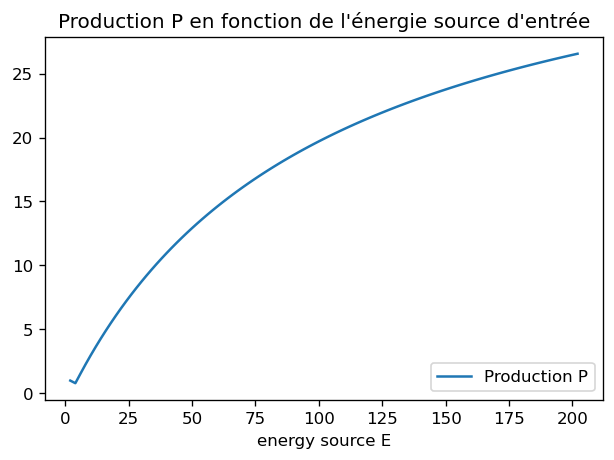

In [315]:
#Tracé des graphes
plt.plot(npe,npp,label = "Production P")
plt.legend(loc="lower right")
plt.xlabel("energy source E")
plt.title("Production P en fonction de l'énergie source d'entrée")
plt.show()

On peut ainsi observer l'évolution de la production en fonction de l'énergie source. Sur le même graphe est représentée les variations de l'énergie source incidente, mais aussi des fluxs et concentrations de matériaux , afin de voir les changements dans la production que ces variations causent.

**Exemples de cas auxquels le modèle s'applique**  
Ce minimodèle permet de simuler des situations, comme on le disait précédemment, où la production par un élément dépend de l'énergie incidente, mais aussi de la dispoinibilité ou non de matériaux, mis à disposition dans un stockage par des fluxs.
Ainsi, la croissance de l'herbe, fonction de l'ensoleillement et de l'apport de nutriments dans le sol par la pluie ou par d'autres fluxs, colle à ce modèle.

**________________________________________**

##### INTLIMIT (Internal Limiting Factors)

Ce modèle montre comment le recyclage de matériaux au sein d'un système peut limiter sa production.
Par exemple, un écosystème dans un aquarium, recevant de l'énergie via une source lumineuse, a une croissance dépendant de la disponibilité de nutriments via le recyclage au sein de l'aquarium. Ce modèle est donc assimilé au précédent (LIMIT), excepté que la concentration en nutriments ne provient pas d'un flux externe.  
Cette fois, les nutriments disponible proviennent de la consommation de la matière organique.

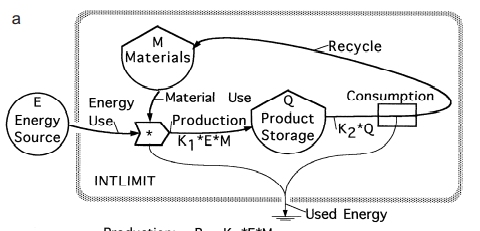

In [316]:
#Définition de la plage temporelle
T0 = 0
T = T0
dT = 1
Tf = 365

In [317]:
#Définition des conditions intiales
S0 = .1 #énergie source initale
S = S0
Q0 = 5 #stock initial
Q = Q0

Mt0 = 20 #concentration en matériaux totale initiale (et définitive car milieu fermé)
Mt = Mt0
f0 = .05 #fraction des matériaux disponibles contenue dans Q (intiale)
f = f0
M = Mt - f*Q #concentration en matériaux utilisables 


#Définition des constantes
K1 = 2
K2 = .5

In [318]:
#Définition des matrices qui vont stocker les valeurs au cours de la boucle de calcul, afin de pouvoir tracer les graphes.
npt = np.array([T]) #temps
npq = np.array([Q]) #stock
nps = np.array([S]) #énergie source
npm = np.array([M]) #concentration en matériaux

In [319]:
#Boucle de calcul

while T < Tf :
    M = Mt - f*Q #concentration en matériaux utilisables
    P = K1*S*M #production, dépendante de l'énergie source et de la concentration en matériaux
    dQ = P - K2*Q 
    Q += dQ
    T += dT 
    #on incrémente les nouvelles valeurs dans les matrices
    npt = np.append(npt,T)
    npq = np.append(npq,Q)
    nps = np.append(nps,S)
    npm = np.append(npm,M)
    

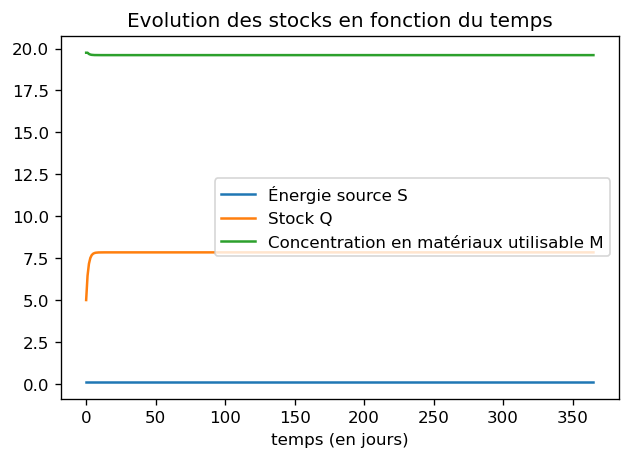

In [320]:
#Tracé des graphes
plt.plot(npt,nps,label = "Énergie source S")
plt.plot(npt,npq,label = "Stock Q")
plt.plot(npt,npm,label = "Concentration en matériaux utilisable M")
plt.legend(loc="right")
plt.title("Evolution des stocks en fonction du temps")
plt.xlabel("temps (en jours)")
plt.show()

On constate qu'on atteint un stade de stabilité, un état quasi-permanent. Le système s'équilibre de lui-même. Le stock se remplit grâce à la production aussi vite qu'il se vide avec la consommation, qui elle-même alimente la production.

**Exemples**  
Ce système s'apparente à ceux de milieu fermés, où la consommation de matériaux alimente la production de ce même matériaux.
On reconnaît également le fonctionnement d'un système de recyclage, par exemple de l'aluminium industriel, en considérant qu'il n'y ait pas de pertes le long de la chaîne.

**________________________________________**

##### DAYP&C (Production and Consumption)

Ce modèle simule une situation de production/consommation, en prenant cette fois en compte l'évolution de la source d'énergie au cours de la journée.  
Cette situation se retrouve par exemple au cours de la photosynthèse, qui est en place place si la lumière est au-delà d'un certain seuil, contre la respiration qui s'opère dans le cas contraire.

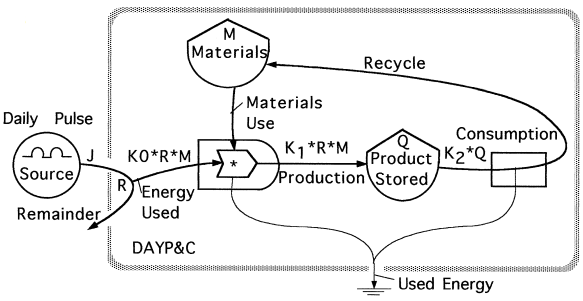

In [321]:
#Définition de la plage temporelle
T0 = 0
T = T0
dT = 1
Tf = 500

In [322]:
#Définition des conditions intiales
Q0 = 5 #stock initial
Q = Q0
S0 = 0 #énergie intiale. ici, elle ne sert que pour la construction de la matrice nps
Mt0 = 1 #concentration en matériaux disponibles initiale (sous forme M ou sous forme Q)
Mt = Mt0
f0 = .01 #fraction de matériaux contenue intialement dans Q
f0 = f
M = Mt-f*Q

#Définition des constantes
K0 = .9
K1 = .2
K2 = .04

In [323]:
#Définition des matrices qui vont stocker les valeurs au cours de la boucle de calcul, afin de pouvoir tracer les graphes.
npt = np.array([T]) #temps
npq = np.array([Q]) #stock
nps = np.array([S0]) #énergie source
npm = np.array([M]) #concentration en matériaux disponibles

In [324]:
#Boucle de calcul

while T < Tf :
    S = 40*np.sin(T/15.9) #énergie source, évoluant au cours de la journée. ici, l'unité de T n'est plus le jour mais le jour/100
    if S <0 :
        S = 0
    R = S/(1+K0*M) #proportion de l'énergie utilisée
    M = Mt - f*Q
    P = K1*R*M #production
    C = K2*Q #consommation
    dQ = P - C
    Q += dQ
    T += dT 
    #on incrémente les nouvelles valeurs dans les matrices
    npt = np.append(npt,T)
    npq = np.append(npq,Q)
    nps = np.append(nps,S)
    npm = np.append(npm,M)
    

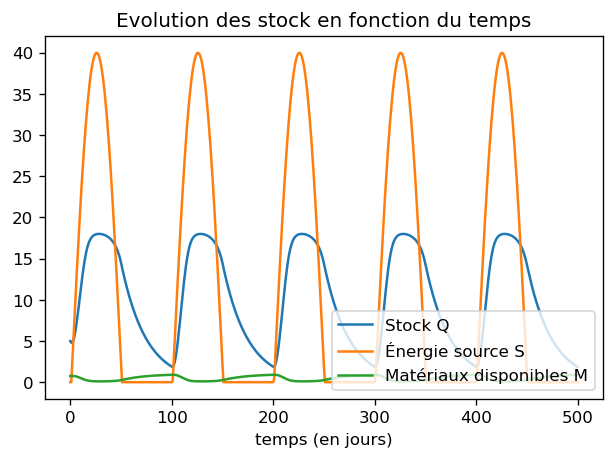

In [325]:
#Tracé des graphes
plt.plot(npt,npq,label = "Stock Q")
plt.plot(npt,nps,label = "Énergie source S")
plt.plot(npt,npm,label = "Matériaux disponibles M")
plt.legend(loc="lower right")
plt.xlabel("temps (en jours)")
plt.title("Evolution des stock en fonction du temps")
plt.show()

Le stock de matière organique augmente au cours de la journée, puis diminue dèsque la lumière n'est plus suffisante. On peut également suivre l'évolution du stock de nutriments M. Ceux-ci sont utilisés au cours de la journée par la photosynthèse, puis reformés au cours de la respiration.
Dans le cas d'une plante, Q peut également correspondre à l'oxygène, qui se comporte de la même façon.

**Exemples**  
Ce programme s'applique bien à de nombreux systèmes naturels, qui montrent des comportements différents la journée de la nuit : végatation, algues, plancton, récifs coraliens, etc...

**________________________________________**

##### OPENAQ (Production and Oxygen in Aquatic Ecosystems)

Ce modèle simule la production, consommation, et recyclage d'un système aquatique, en prenant en compte l'oxygène dissous et ses échanges avec l'atmosphère.    
Quand la lumière est suffisante, on a production d'oxygène et de matière organique. Ils sont consommés pour générer des nutriments M (y compris le dioxide de carbone) et recyclés.

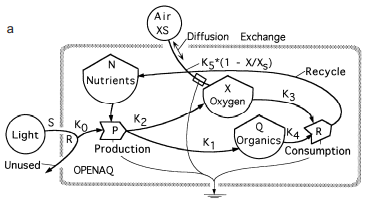

In [326]:
#Définition de la plage temporelle
T0 = 0
T = T0
dT = 1
Tf = 500

In [327]:
#Définition des conditions intiales
Q0 = 10 #stock initial
Q = Q0
X0 = 8 #concentration en oxygène dissous initiale, en ppm
X = X0
XS = 8 #concentration saturante
S0 = 0 #énergie intiale. ici, elle ne sert que pour la construction de la matrice nps
Mt0 = 1.5 #concentration en matériaux disponibles initiale
Mt = Mt0
f0 = .05 #fraction de matériaux contenue intialement dans Q
f0 = f
M = 0


#Définition des constantes
K0 = np.math.factorial(9)
K1 = 10
K2 = 10
K3 = .01
K4 = .01
K5 = .1

In [328]:
#Définition des matrices qui vont stocker les valeurs au cours de la boucle de calcul, afin de pouvoir tracer les graphes.
npt = np.array([T]) #temps
npq = np.array([Q]) #stock
nps = np.array([S0]) #énergie source
npm = np.array([M]) #concentration en matériaux disponibles
npx = np.array([X]) #concentration en oxygène dissous

In [329]:
#Boucle de calcul

while T < Tf :
    S = np.sin(T/15.9) #énergie source, évoluant au cours de la journée. ici, l'unité de T n'est plus le jour mais le jour/100
    if S <0 :
        S = 0
    M = Mt - f*Q
    if M < .00001 :
        M = .00001 #pour éviter des bugs
    R = S/(1+K0*M) #proportion de l'énergie utilisée
    PQ = K1*R*M #production Q
    CQ = K4*Q*X #consommation Q
    dQ = PQ - CQ
    PX = K2*R*M #production X
    CX = K3*Q*X #consommation X
    DiffX = K5*(1-X/XS) #échanges diffusifs avec l'atmopshère
    dX = PX - CX +DiffX
    Q += dQ
    X += dX
    T += dT 
    #on incrémente les nouvelles valeurs dans les matrices
    npt = np.append(npt,T)
    npq = np.append(npq,Q)
    npx = np.append(npx,X)
    nps = np.append(nps,S)
    npm = np.append(npm,M)
    

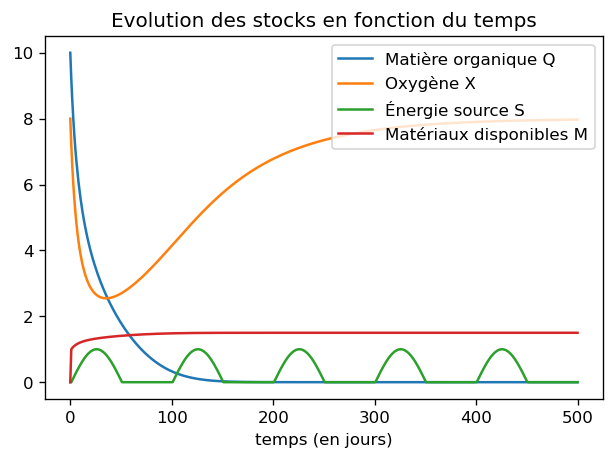

In [330]:
#Tracé des graphes
plt.plot(npt,npq,label = "Matière organique Q")
plt.plot(npt,npx,label = "Oxygène X")
plt.plot(npt,nps,label = "Énergie source S")
plt.plot(npt,npm,label = "Matériaux disponibles M")
plt.legend(loc="upper right")
plt.xlabel("temps (en jours)")
plt.title("Evolution des stocks en fonction du temps")
plt.show()

*Note à moi-même : Je ne retrouve pas les mêmes comportements qu'Odum.*

**Exemples**  
Ce programme s'applique bien au milieux aquatiques en contact avec l'atmosphère, comme des aquariums, étangs, mares...  
Il est possible de faire évoluer ce modèle pour prendre en compte un taux de diffusion de l'oxygène, qui dépend des courants, vagues, etc. (voir *Modelling for all scales*).

**________________________________________**

##### AUTOCYCL ( Logistic autocatalytic production and recycle)

Ce modèle simule une situation au cours de laquelle un consommateur autocatalytique, alimenté par des matériaux (nutriments), alterne entre une réserve N et une réserve C.  
Dans ce modèle, la source d'énergie est constante, et la croissance est limitée par la disponibilité des nutriments.

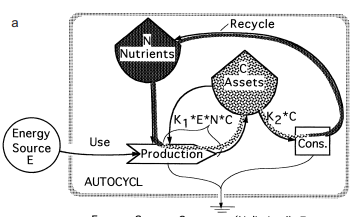

In [331]:
#Définition de la plage temporelle
T0 = 0
T = T0
dT = 1
Tf = 365*10

In [332]:
#Définition des conditions intiales
C0 = .05 #stock C initial
C = C0
E0 = 1 #énergie intiale
E = E0
N0 = 1.5 #stock N initial
N = N0
Nt0 = 200 #nutriments totaux
Nt = Nt0
f0 = .1 #fraction de matériaux contenue intialement dans C
f = f0

#Définition des constantes
K1 = .0002
K2 = .02

In [333]:
#Définition des matrices qui vont stocker les valeurs au cours de la boucle de calcul, afin de pouvoir tracer les graphes.
npt = np.array([T]) #temps
npn = np.array([N]) #stock N
npc = np.array([C]) #stock C

In [334]:
#Boucle de calcul

while T < Tf :
    N = Nt - f*C
    if N < .001 :
        N = .001 #pour éviter des bugs
    dC = K1*E*N*C - K2*C
    C += dC
    T += dT 
    #on incrémente les nouvelles valeurs dans les matrices
    npt = np.append(npt,T)
    npc = np.append(npc,C)
    npn = np.append(npn,N)    

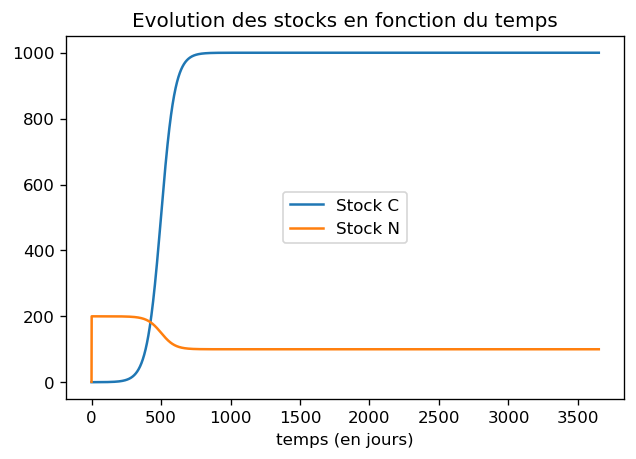

In [335]:
#Tracé des graphes
plt.plot(npt,npc,label = "Stock C")
plt.plot(npt,npn,label = "Stock N")
plt.legend(loc="center")
plt.xlabel("temps (en jours)")
plt.title("Evolution des stocks en fonction du temps")
plt.show()

On constate une croissance exponentielle, jusqu'à un état stable, ou la réserve de nutriments permet de maintenir un stock constant.

**Exemples**  
De nombreux modèles d'écosystèmes ont des coefficients de croissance constants (énergie source infinie, notamment solaire), mais sont stabilisés en incluant des cycles de nutriments limitants.  
Certains auteurs estiments que la civilisation humaine peut en fin de compte être limitéer par la difficulté de recycler certains matériaux critiques. On aurait alors un modèle de croissance similaire à celui-ci.

**_______________________**

### I.II Modèles de croissance

Ces modèles décrivent des croissances d'un simple stock, sous l'effet de diverses sources, pertes et actions autocatalytiques

##### RENEW (Autocatalytic Growth on a Renewable Source)

Ce modèle simule une situation au cours de laquelle un stockage croit sous l'action d'une source d'énergie renouvelable, et subit des pertes en même temps.

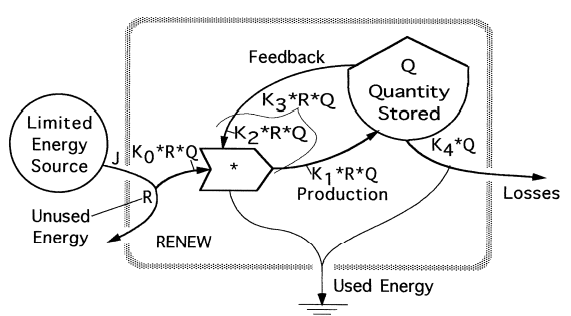

In [336]:
#Définition de la plage temporelle
T0 = 0
T = T0
dT = 1
Tf = 365

In [337]:
#Définition des conditions intiales
J0 = 45 #énergie source intiale
J = J0
Q0 = 1 #stock initial
Q = Q0

#Définition des constantes
K0 = .1
K3 = .008
K4 = .03

In [338]:
#Définition des matrices qui vont stocker les valeurs au cours de la boucle de calcul, afin de pouvoir tracer les graphes.
npt = np.array([T]) #temps
npq = np.array([Q]) #stock

In [339]:
#Boucle de calcul

while T < Tf :
    R = J/(1 + K0*Q) #portion de l'énergie source utilisée
    dQ = K3*R*Q - K4*Q
    Q += dQ
    T += dT 
    #on incrémente les nouvelles valeurs de T et de Q dans les matrices
    npt = np.append(npt,T)
    npq = np.append(npq,Q)

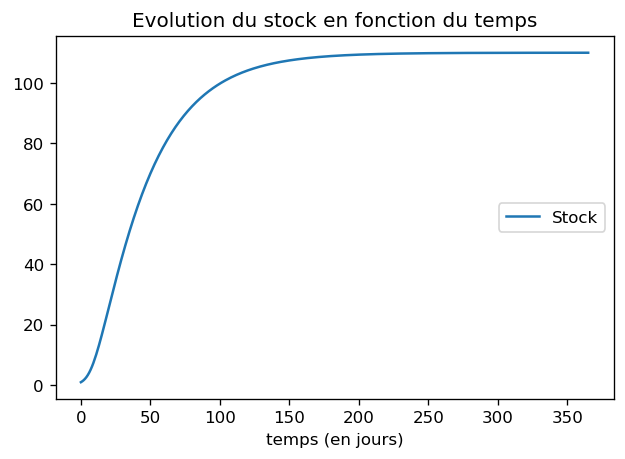

In [340]:
#Tracé des graphes
plt.plot(npt,npq,label = "Stock")
plt.legend(loc="right")
plt.xlabel("temps (en jours)")
plt.title("Evolution du stock en fonction du temps")
plt.show()

On constate la réponse simple du système. Sous l'action de la source d'énergie, le stock croit jusq'à une valeur stable, ou les pertes (K4.Q) équilibrent l'alimentation/recyclage du stock (K3.R.Q).

**Exemples**  
Ce modèle est approprié pour les système naturels de type forêt, champs, rivières, lacs... qui croissent sur des sources d'énergie renouvelables à l'infini mais limitée en intensité : soleil, vent, pluie, marées etc).

**_______________________**

##### SLOWREN (Growth on a Slowly Renewable Sources)

Ce modèle simule la croissance d'un système sous l'action d'une source érngétique qui est cette fois lentement renouvelable. On considère donc une réserve d'énergie E, alimentée lentement par une source infinie. C'est dans cette réserve E que le système puise pour alimenter sa croissance.

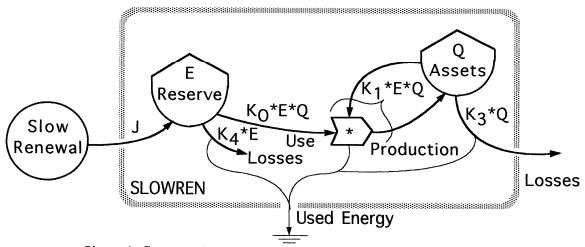

In [341]:
#Définition de la plage temporelle
T0 = 0
T = T0
dT = 1
Tf = 365

In [342]:
#Définition des conditions intiales
J0 = 2 #énergie source alimentant la réserve E intiale
J = J0
E0 = 1.2 #réserve d'énergie E intial
E = E0
Q0 = 1 #stock Q initial
Q = Q0

#Définition des constantes
K0 = .001
K1 = .001
K3 = .03
K4 = .01

In [343]:
#Définition des matrices qui vont stocker les valeurs au cours de la boucle de calcul, afin de pouvoir tracer les graphes.
npt = np.array([T]) #temps
npq = np.array([Q]) #stock Q
npe = np.array([E]) #stock E


In [344]:
#Boucle de calcul

while T < Tf :
    dQ = K1*E*Q - K3*Q
    dE = J - K0*E*Q- K4*E
    Q += dQ
    E += dE
    T += dT 
    #on incrémente les nouvelles valeurs dans les matrices
    npt = np.append(npt,T)
    npq = np.append(npq,Q)
    npe = np.append(npe,E)

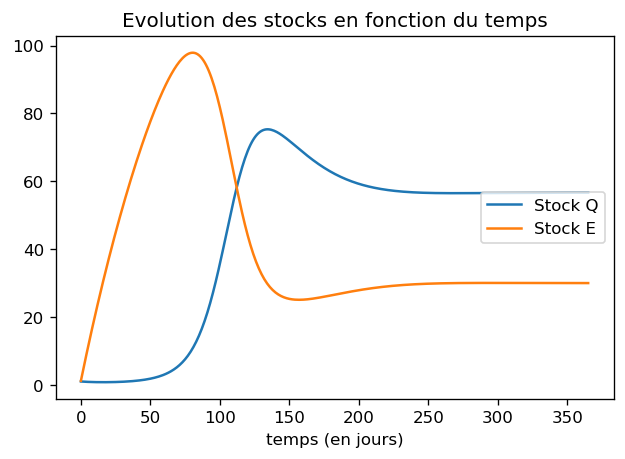

In [345]:
#Tracé des graphes
plt.plot(npt,npq,label = "Stock Q")
plt.plot(npt,npe,label = "Stock E")
plt.legend(loc="right")
plt.xlabel("temps (en jours)")
plt.title("Evolution des stocks en fonction du temps")
plt.show()

On assiste à un équilibrage des deux stocks, lorsque les flux entrants compensent les flux sortants.

**Exemples**  
Ce modèle est approprié pour les système naturels qui croissent sur des sources d'énergie qui se renouvellent de façon suffisamment lente pour atteindre un équilibre, mais tout de même à une échelle de temps similaire.

**_______________________**

##### NONREN (Growth on a Non-Renewable Source)

Ce modèle simule la croissance d'un système sous l'action d'une source cette fois non-renouvelable. On considère donc une réserve d'énergie E, donc le stock fixé au départ n'est pas réalimenté. C'est dans cette réserve E que le système puise pour alimenter sa croissance.

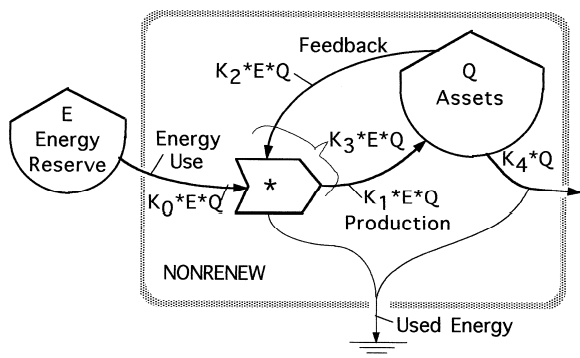

In [346]:
#Définition de la plage temporelle
T0 = 0
T = T0
dT = 1
Tf = 365

In [347]:
#Définition des conditions intiales
E0 = 160 #stock d'énergie E intial
E = E0
Q0 = 1 #stock Q initial
Q = Q0

#Définition des constantes
K0 = .001
K1 = .001
K4 = .03

In [348]:
#Définition des matrices qui vont stocker les valeurs au cours de la boucle de calcul, afin de pouvoir tracer les graphes.
npt = np.array([T]) #temps
npq = np.array([Q]) #stock Q
npe = np.array([E]) #stock E


In [349]:
#Boucle de calcul

while T < Tf :
    dQ = K1*E*Q - K4*Q
    dE = -K0*E*Q
    Q += dQ
    E += dE
    T += dT 
    #on incrémente les nouvelles valeurs dans les matrices
    npt = np.append(npt,T)
    npq = np.append(npq,Q)
    npe = np.append(npe,E)

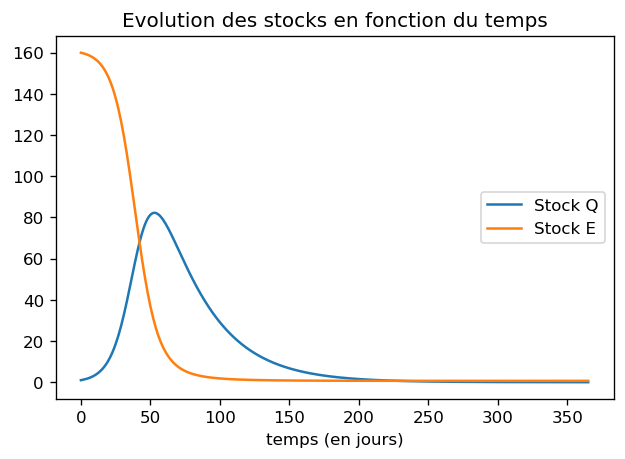

In [350]:
#Tracé des graphes
plt.plot(npt,npq,label = "Stock Q")
plt.plot(npt,npe,label = "Stock E")
plt.legend(loc="right")
plt.xlabel("temps (en jours)")
plt.title("Evolution des stocks en fonction du temps")
plt.show()

Comme attendu, le stock E diminue jusqu'à être entièrement épuisé. Le stock Q augmente en se "nourrissant" de E, puis diminue jusqu'à 0 lorsque le stock E est vide.

**Exemples**  
Ce modèle est approprié pour les système utilisant des stocks d'énergie qui ne se renouvellent pas du tout. Un modèle économique équivalent pourrait être la croissance d'une ville minière, qui croit grâce aux revenus de l'exploitation de la mine. Quand celle-ci est épuisée, la ville meure.

**_______________________**

##### 2SOURCE (Growth on a Renewable and a Non-Renewable Source)

Ce modèle simule la croissance d'un système sous l'action combinée de 2 sources, l'une renouvelable et l'autre non. On a donc une simulation qui combine 2 des modèles précedents.

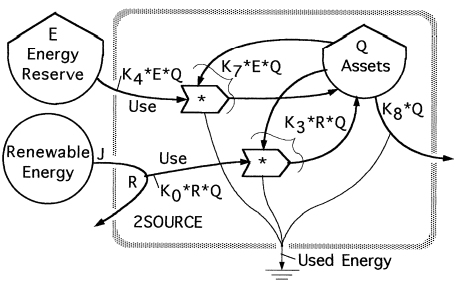

In [351]:
#Définition de la plage temporelle
T0 = 0
T = T0
dT = 1
Tf = 365

In [352]:
#Définition des conditions intiales
J0 = 80 #énergie source intitiale
J = J0
E0 = 150 #stock d'énergie E intial
E = E0
Q0 = 1 #stock Q initial
Q = Q0

#Définition des constantes
K0 = .1
K3 = .002
K4 = .0007
K7 = .0008
K8 = .03

In [353]:
#Définition des matrices qui vont stocker les valeurs au cours de la boucle de calcul, afin de pouvoir tracer les graphes.
npt = np.array([T]) #temps
npq = np.array([Q]) #stock Q
npe = np.array([E]) #stock E


In [354]:
#Boucle de calcul

while T < Tf :
    R = J/(1+K0*Q) #portion de l'énergie utilisée
    dQ = K7*R*Q + K3*E*Q - K8*Q
    dE = -K4*E*Q
    Q += dQ
    E += dE
    T += dT 
    #on incrémente les nouvelles valeurs dans les matrices
    npt = np.append(npt,T)
    npq = np.append(npq,Q)
    npe = np.append(npe,E)

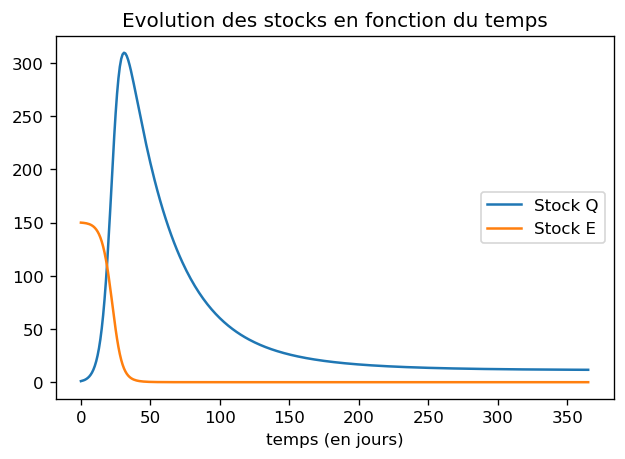

In [355]:
#Tracé des graphes
plt.plot(npt,npq,label = "Stock Q")
plt.plot(npt,npe,label = "Stock E")
plt.legend(loc="right")
plt.xlabel("temps (en jours)")
plt.title("Evolution des stocks en fonction du temps")
plt.show()

Le stock Q croit formtement lorsque la réserve E non-renouvelable est encore pleine, puis, lorsque celle-ci est vide, il décroit jusqu'à une valeur stable, ou les pertes compensen exactement la croissance par la source renouvelable.

**Exemples**  
Un exemple de la pertinence de ce modèle est la croissance d'une population de microbes qui s'alimentent grâce à la décomposition de feuilles mortes. Au départ, il y a une importante réserve de feuilles, permettant à la population de croître rapidement. Puis, lorsque la réserve est épuisée, la population ne survit que grâce aux feuilles qui tombent de façon continue. La population retombe donc jusqu'à une valeur stable. 

**_______________________**

##### LOGISTIC (Logistic Growth)

Ce modèle est la combinaison d'une production autocatalytique utilisant une source d'énergie constante (infinie), est une perte d'ordre quadratique, représentent les effets de l'**encombrement**.

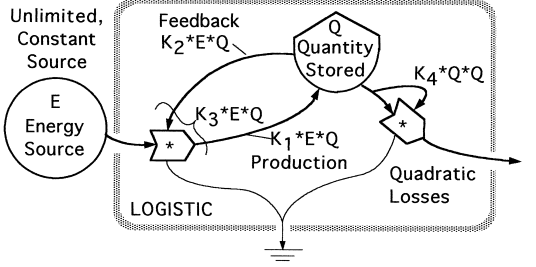

In [356]:
#Définition de la plage temporelle
T0 = 0
T = T0
dT = 1
Tf = 365

In [357]:
#Définition des conditions intiales
E0 = 10 #énergie source initiale
E = E0
Q0 = 1 #stock Q initial
Q = Q0

#Définition des constantes
K3 = .005
K4 = .0005

In [358]:
#Définition des matrices qui vont stocker les valeurs au cours de la boucle de calcul, afin de pouvoir tracer les graphes.
npt = np.array([T]) #temps
npq = np.array([Q]) #stock Q


In [359]:
#Boucle de calcul

while T < Tf :
    dQ = K3*E*Q - K4*Q*Q
    Q += dQ
    T += dT 
    #on incrémente les nouvelles valeurs dans les matrices
    npt = np.append(npt,T)
    npq = np.append(npq,Q)

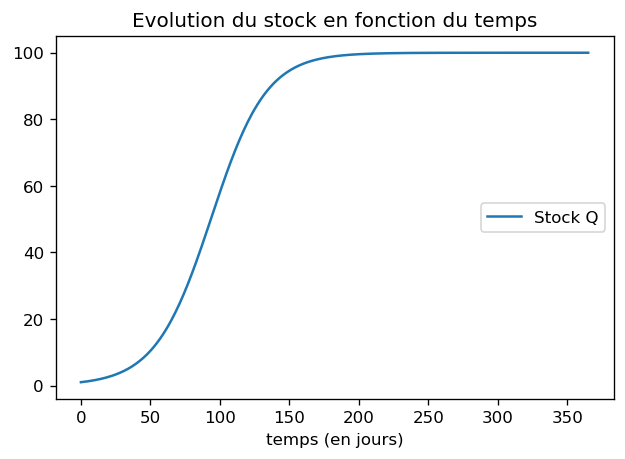

In [360]:
#Tracé des graphes
plt.plot(npt,npq,label = "Stock Q")
plt.legend(loc="right")
plt.xlabel("temps (en jours)")
plt.title("Evolution du stock en fonction du temps")
plt.show()

Une fois de plus, on observe un équilibre, lorssque le taux de pertes équilibre le taux de production.

**Exemples**  
Ce modèle peut à nouveau s'appliquer à une population de microbes par exemple, en croissance d'abord exponentielle grâce à l'abondance de ressources par rapport à la population initiale. Puis au fur et à mesure de l'augmentation de la population, on observe des pertes encore plus importantes due au surencombrement, qui est la cause du stress, de la toxicité.

**_______________________**

### I.III Modèles de compétition et de coopération

Ces modèles décrivent les comportement de mulitples éléments, qui interagissent différemment avec les sources d'énergie, de façon autocatalytique, mais aussi entre eux.  
On observera ainsi selon les situations, des cas où l'une des population évincera complètement les autres, ou des situations ouù on peut observer une coexistence.

##### EXCLUS (Competition for a Limited Source)

Ce modèle simule une situation au cours de laquelle deux populations utilisent une même source d'alimentation qui est limitée. La croissance d'une population va ainsi freiner la croissance de la seconde, et inversement.

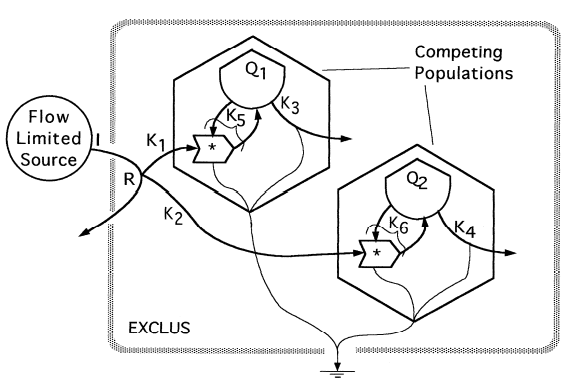

In [361]:
#Définition de la plage temporelle
T0 = 0
T = T0
dT = 1
Tf = 365

In [362]:
#Définition des conditions intiales
I0 = 5 #flux d'alimentation intial
I = I0
Q10 = 1 #population 1 initiale
Q1 = Q10
Q20 = 1 #population 2 initiale
Q2 = Q20

#Définition des constantes
K1 = .08
K2 = .04
K3 = .05
K4 = .05
K5 = .09
K6 = .05
K7 = .003
K8 = .003

In [363]:
#Définition des matrices qui vont stocker les valeurs au cours de la boucle de calcul, afin de pouvoir tracer les graphes.
npt = np.array([T]) #temps
npq1 = np.array([Q1]) #stock 1
npq2 = np.array([Q2]) #stock 2

In [364]:
#Boucle de calcul

while T < Tf :
    R = I/(1 + K1*Q1 + K2*Q2) #portion de l'énergie source utilisée
    if R <0 :
        R = 0 #anti-bug
    dQ1 = K5*R*Q1 - K3*Q1
    dQ2 = K6*R*Q2 - K4*Q2
    Q1 += dQ1
    Q2 += dQ2
    T += dT 
    #on incrémente les nouvelles valeurs dans les matrices
    npt = np.append(npt,T)
    npq1 = np.append(npq1,Q1)
    npq2 = np.append(npq2,Q2)

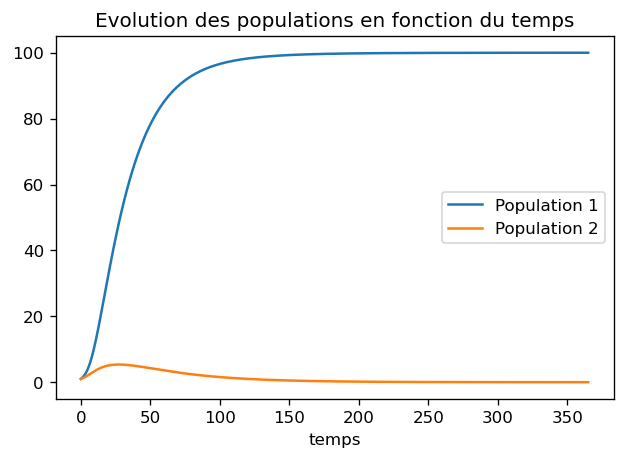

In [365]:
#Tracé des graphes
plt.plot(npt,npq1,label = "Population 1")
plt.plot(npt,npq2,label = "Population 2")
plt.legend(loc="right")
plt.xlabel("temps")
plt.title("Evolution des populations en fonction du temps")
plt.show()

On constate la réponse simple du système. Sous l'action de la source d'énergie, le stock croit jusq'à une valeur stable, ou les pertes (K4.Q) équilibrent l'alimentation/recyclage du stock (K3.R.Q).  
On peut également regarder le tracé de Q1 en fonction de Q2.

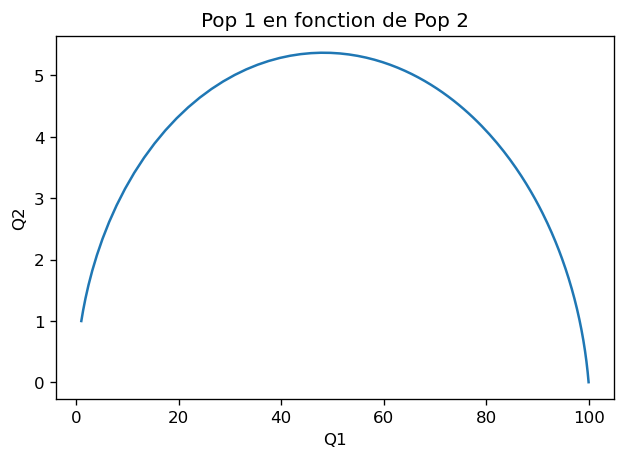

In [366]:
plt.plot(npq1,npq2)
plt.title("Pop 1 en fonction de Pop 2")
plt.xlabel("Q1")
plt.ylabel("Q2")
plt.show()

**Exemples**  
Ici, il y a exclusion totale d'une des deux populations, car elle est moins adaptée que l'autre à la surive (moins bon coeff d'exploitation des ressources, ou plus gros coeff de pertes).  
Cette situation peut s'observer dans la nature chez certaines populations de flore ou de faune, dont l'une est mieux adaptée que l'autre, et entraine sa disparition.

**_______________________**

##### TWOPOP (Two Populations in Exponential Growth)

2 populations croissent de façon exponentielle à partir d'une ressource infinie. Quand la population augmente, l'action autocatalytique accélère encore cette croissance, d'où l'effet exponentiel.

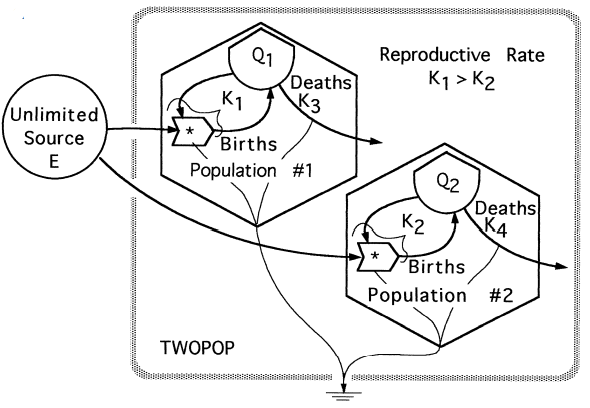

In [367]:
#Définition de la plage temporelle
T0 = 0
T = T0
dT = 1
Tf = 365

In [368]:
#Définition des conditions intiales
E0 = 1 #ressource infinie intial
E = E0
Q10 = 1 #population 1 initiale
Q1 = Q10
Q20 = 1 #population 2 initiale
Q2 = Q20

#Définition des constantes
K1 = .07
K2 = .072
K3 = .05
K4 = .05

In [369]:
#Définition des matrices qui vont stocker les valeurs au cours de la boucle de calcul, afin de pouvoir tracer les graphes.
npt = np.array([T]) #temps
npq1 = np.array([Q1]) #stock 1
npq2 = np.array([Q2]) #stock 2

In [370]:
#Boucle de calcul

while T < Tf :
    dQ1 = K1*E*Q1 - K3*Q1
    dQ2 = K2*E*Q2 - K4*Q2
    Q1 += dQ1
    Q2 += dQ2
    T += dT 
    #on incrémente les nouvelles valeurs dans les matrices
    npt = np.append(npt,T)
    npq1 = np.append(npq1,Q1)
    npq2 = np.append(npq2,Q2)

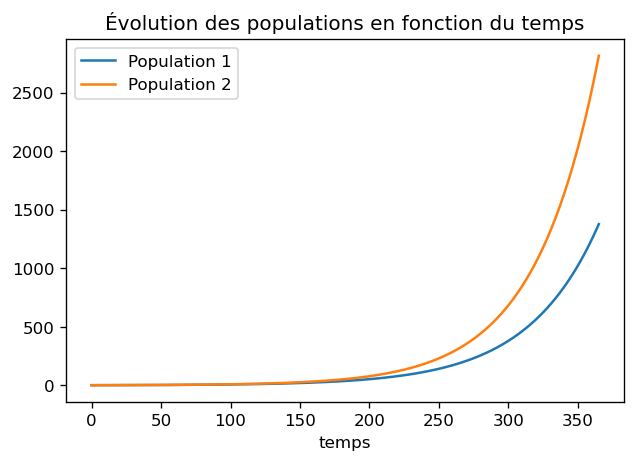

In [371]:
#Tracé des graphes
plt.plot(npt,npq1,label = "Population 1")
plt.plot(npt,npq2,label = "Population 2")
plt.legend(loc="upper left")
plt.xlabel("temps")
plt.title("Évolution des populations en fonction du temps")
plt.show()

Les 2 populations n'interagissent pas entre elles, elles suivent simplement une croissance exponentielle chacune de son côté.

**Exemples**  
La croissance exponentielle de plusieurs populations en parallèle peut s'observer dans les premiers stades du développement d'espèces animales, végétales ou bactériennes.

**_______________________**

##### INTERACT (Two Populations in Competitive Interactive Growth)

2 populations interagissent de façon competitives entre elles. Chacune à une croissance exponentielle et des pertes quadratiques, ce qui rend leur croissance logistique (voir modèles précédents). Les ressources sont infinies.

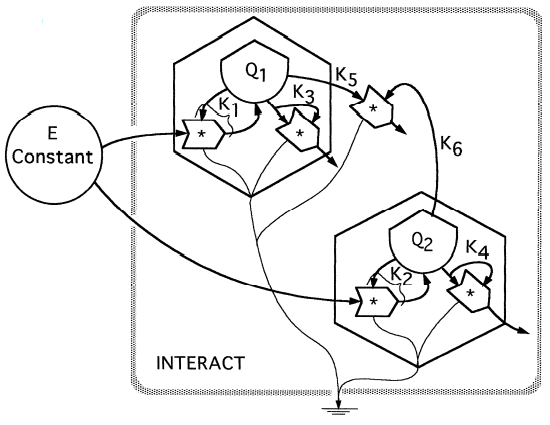

In [372]:
#Définition de la plage temporelle
T0 = 0
T = T0
dT = 1
Tf = 365

In [373]:
#Définition des conditions intiales
E0 = 1 #flux d'alimentation intiale
E = E0
Q10 = 1 #population 1 initiale
Q1 = Q10
Q20 = 1 #population 2 initiale
Q2 = Q20

#Définition des constantes
K1 = .07
K2 = .08
K3 = .002
K4 = .001
K5 = .002
K6 = .001

In [374]:
#Définition des matrices qui vont stocker les valeurs au cours de la boucle de calcul, afin de pouvoir tracer les graphes.
npt = np.array([T]) #temps
npq1 = np.array([Q1]) #stock 1
npq2 = np.array([Q2]) #stock 2

In [375]:
#Boucle de calcul

while T < Tf :
    dQ1 = K1*E*Q1 - K3*Q1*Q1 - K5*Q1*Q2
    dQ2 = K2*E*Q2 - K4*Q2*Q2 - K6*Q1*Q2
    Q1 += dQ1
    Q2 += dQ2
    T += dT 
    #on incrémente les nouvelles valeurs dans les matrices
    npt = np.append(npt,T)
    npq1 = np.append(npq1,Q1)
    npq2 = np.append(npq2,Q2)

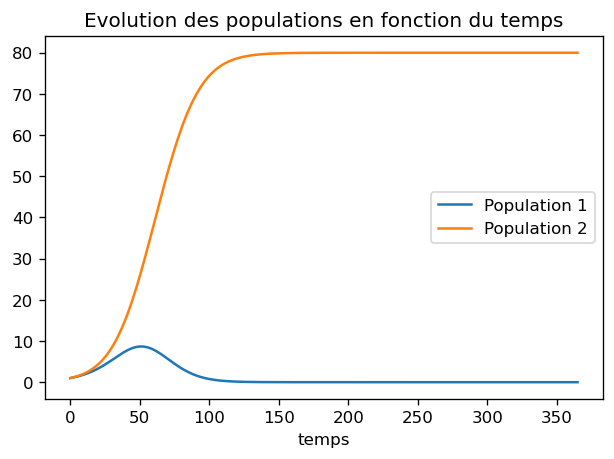

In [376]:
#Tracé des graphes
plt.plot(npt,npq1,label = "Population 1")
plt.plot(npt,npq2,label = "Population 2")
plt.legend(loc="right")
plt.xlabel("temps")
plt.title("Evolution des populations en fonction du temps")
plt.show()

L'une des populations est éliminée car l'interaction est favorable à l'autre population (ici traduit par K5>K6).  
L'autre population atteint une valeur stable comme prévu par le modèle LOGISTIC (ressource infinie, pertes quadratiques).

**Exemples**  
Des exemples de compétitions excluantes peut se retrouver également facilement dans la nature. Par exemple, 2 variétés de scarabée à grain dans une grande réserve de farine. Le développement d'une population va empêcher le développement de l'autre pour diverses raisons (l'une attaque l'autre par exemple).  
On retrouve également ceci avec 2 expèces de mauvaises herbes, dont l'une produit une substance empêchant le développement de l'autre.

**_______________________**

##### CO-OP (Two Population that Cooperate)

Ici, 2 populations se développent à partir de la même ressource renouvelable, un flux constant d'énergie. Mais cette fois, les stocks de chaque population aident au développement de l'autre, résultant en une coopération mutuelle.

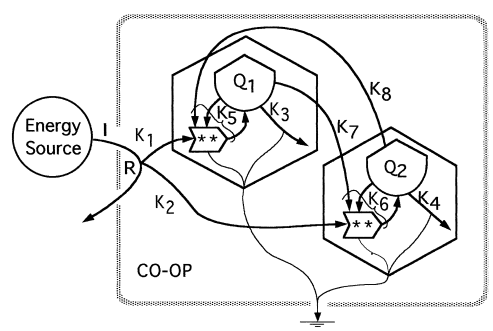

In [377]:
#Définition de la plage temporelle
T0 = 0
T = T0
dT = 1
Tf = 365

In [378]:
#Définition des conditions intiales
I0 = 20 #flux d'alimentation intial
I = I0
Q10 = 1 #population 1 initiale
Q1 = Q10
Q20 = 1 #population 2 initiale
Q2 = Q20

#Définition des constantes
K1 = .08
K2 = .04
K3 = .05
K4 = .05
K5 = .09
K6 = .05
K7 = .002
K8 = .002

In [379]:
#Définition des matrices qui vont stocker les valeurs au cours de la boucle de calcul, afin de pouvoir tracer les graphes.
npt = np.array([T]) #temps
npq1 = np.array([Q1]) #stock 1
npq2 = np.array([Q2]) #stock 2

In [380]:
#Boucle de calcul

while T < Tf :
    R = I/(1 + K1*Q1*Q2 + K2*Q1*Q2) #portion de l'énergie source utilisée
    if R <0 :
        R = 0 #anti-bug
    dQ1 = K5*R*Q1*Q2 - K7*Q1*Q2 - K3*Q1
    dQ2 = K6*R*Q1*Q2 - K8*Q1*Q2 - K4*Q2
    Q1 += dQ1
    Q2 += dQ2
    T += dT 
    #on incrémente les nouvelles valeurs dans les matrices
    npt = np.append(npt,T)
    npq1 = np.append(npq1,Q1)
    npq2 = np.append(npq2,Q2)

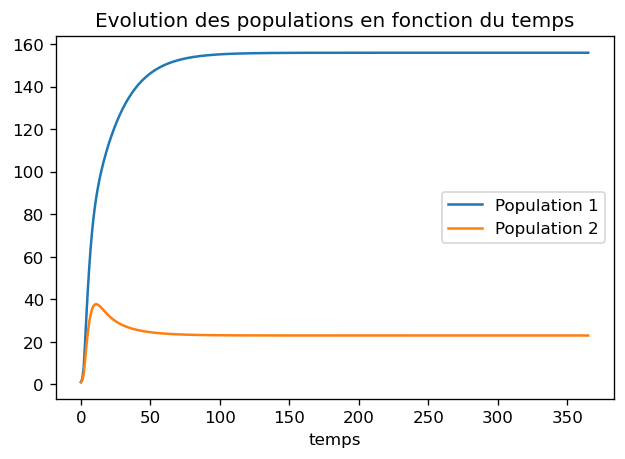

In [381]:
#Tracé des graphes
plt.plot(npt,npq1,label = "Population 1")
plt.plot(npt,npq2,label = "Population 2")
plt.legend(loc="right")
plt.xlabel("temps")
plt.title("Evolution des populations en fonction du temps")
plt.show()

Les 2 populations parviennent à coexister, elles atteignent chacun un état stable ou la croissance égale les pertes.

**Exemples**  
On observe des situations de coopération régulièrement dans la nature, ou entre les activités humaines par exemple. on appelle cela en écologie des *symbioses*. Les abeilles pollinisent les plantes, qui nourrissent les abeilles en retour.

**_______________________**

**_______________**

De nombreux autres modèles sont construits par Odum dans *Modelling for all scales*. Se référer à cet ouvrage pour construire ces programmes.

**Modèles oscillants** :
1. Proie-Prédateur
2. Oscillation à 3 niveaux
3. Régulation "switch"
4. Pulse & Recycle
5. Pulse & Destruct
6. Pseudo-chaos de paires oscillantes  
  
**Modèles de succession et d'évolution**  
**Modèles de micro-économie**  
**Modèles de macro-économie**  
**Modèles de relations internationales et d'échange**  
**Modèles de la géobiosphère globale** :
1. Dioxyde de carbone
2. Population mondiale
3. Process géologiques dans l'évolution terrestre
4. Un état suivant un minimodèle mondial

**___________**

## Partie II - Application

Une fois les modèles fondamentaux construits, il devient possible de les appliquer à des cas réels. Pour cela, il convient d'appliquer une méthodologie précise, qui sera détaillée, afin de décrire et simuler de façon la plus fidèle la situation observée.

Nous allons donc voir la procédure d'analyse d'un système. Cette procédure est critiquable sur divers points, et il est nécessaire d'être conscient du niveau de fidélité que l'on peut espérer de telles simulations.

Pour étudier une situation réelle, il convient tout d'abord de réfléchir au niveau de complexité qui est souhaité. Celui-ci dépendra du niveau de précision voulu, de l'échelle du système... Une fois ce niveau de complexité bien en tête, on peut commencer à analyser le système :  

1. Définir les limites physiques du système étudié
2. Définir la plage temporelle étudiée
3. Lister de façon la plus complète possible en accord avec le niveau de complexité voulu :  
    a. les sources externes d'énergie  
    b. les fluxs externes de matériaux  
    c. les composants internes du système : producteurs, stocks, consommateurs  
    d. les interactions des élements : avec eux-même, entre eux, avec l'extérieur  
4. Dessiner le diagramme, en donnant un nom aux flux et aux élements
5. Noter les équations, en nommant les constantes
6. Mesurer et reporter les valeurs des fluxs
7. Mesurer et reporter les valeurs des stocks
8. Avec une table de calibration, calculr les coefficients K
8. Rédiger le programme
9. Débugger, affiner, perfectionner
10. Extraire les indicateurs et les graphes intéressants


### Etude de cas - Lagon tropical à Porto-Rico

On se penche sur une situation exemple : un lagon tropical à Porto-Rico.  
Dans un premier temps, on définit les frontières physiques du système : ce sont les limites du lagon.  
Ensuite, on fixe l'échelle temporelle. On étudie sur plusiuers années, avec un dT = 1jour.  
Puis on fait la liste des composants et des interactons du système, qu'on reporte ensuite sur un schéma.  
Ensuite, on a mesuré les valeurs des stocks et des fluxs, qu'on a reportés sur le diagramme.  
    
Les coefficients ont ensuite été estimés grâce à une étape de calibration, dont nous parlerons plus loin.

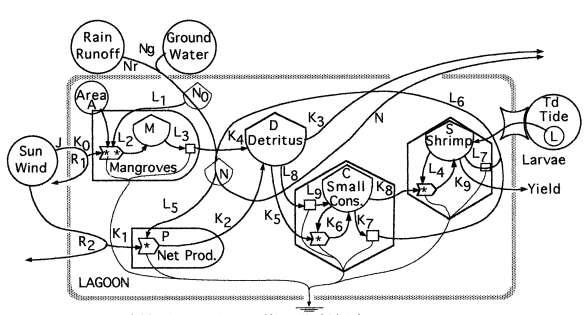

Le code simulant ce système se présente comme suit :

In [382]:
#Définition de la plage temporelle
T0 = 0
T = T0
dT = 1/365
Tf = 9

In [383]:
#Définition des conditions intiales
C0 = 2 #stock de Small Consumers intial
C = C0
P0 = .02 #production nette initiale
P = P0
D0 = 100 #stock de détritus initiale
D = D0
M0 = 100000 #stock de mangroves initiale
M = M0
A = .1 #surface de terrain occupée par la mangrove
Y0 = 4 #production de Shrimp initiale
Y = Y0
No0 = 10 #stock de N0 initial
No = No0
N0 = .1 #stock de N initial
N = N0
S0 = 2 #stock de Shrimp initial
S = S0
L0 = .1 #stock de larves initial
L = L0

#Définition des sources
TD = 1 #marées
NG = 1 #eau du sol
NR = 1 #eau de pluie
J = 1 #soleil & vent


#Définition des constantes
K0 = 45
K1 = 90
K2 = 200000
K3 = .167
K4 = .01
K5 = .067
K6 = .0167
K7 = 10
K8 = 1.5
K9 = .33
L1 = 50
L2 = 5000
L3 = .01
L4 = .3
L5 = 240
L6 = .05
L7 = 3
L8 = .02
L9 = .002

In [384]:
#Définition des matrices qui vont stocker les valeurs au cours de la boucle de calcul, afin de pouvoir tracer les graphes.
npt = np.array([T]) #temps
npy = np.array([Y]) #shrimp
npc = np.array([C]) #small consumers
npd = np.array([D]) #détritus
npm = np.array([M]) #mangrove

In [385]:
#Boucle de calcul

while T < Tf :
    R1 = J/(1 + K0*A*No) #portion de l'énergie solaire utilisée pour la mangrove
    R2 = J/(1+K1*N) #portion de l'énergie solair utilisée pour la production nette
    No = (NR + NG)/(1 + L1*A*R1)
    N = (No + L6*C)/(1 + L5*R2)
    if N < .00001 :
        N = .00001 #antibug
    P = K2*R2*N
    Y = K9*S*TD
    #Nouvelles valeurs des stocks
    dD = P - K3*D - K5*C*D + K4*M - L8*D
    dC = K6*D*C - K7*C - K8*C*S + L9*D
    dS = L4*C*S - K9*S - L7*S + L*TD
    dM = L2*A*No*R1 - L3*M
    D += dD*dT
    C += dC*dT
    S += dS*dT
    M += dM*dT
    T += dT
    if C < .0001 :
        C = .0001 #antibug
    #on incrémente les nouvelles valeurs dans les matrices
    npt = np.append(npt,T)
    npy = np.append(npy,Y)
    npc = np.append(npc,C)
    npd = np.append(npd,D)
    npm = np.append(npm,M)

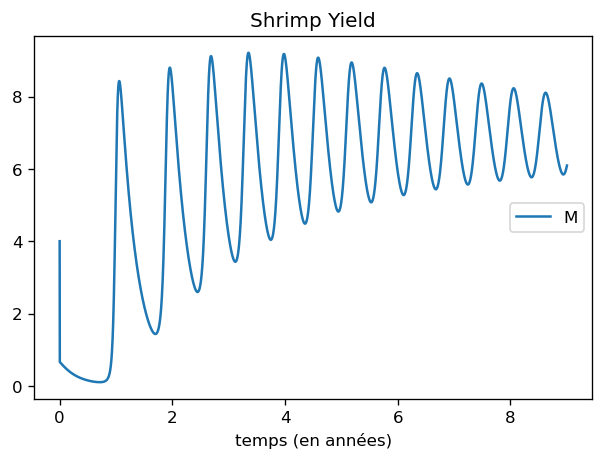

In [386]:
#Tracé des graphes
plt.plot(npt,npy,label = "M")
plt.title("Shrimp Yield")
plt.legend(loc="right")
plt.xlabel("temps (en années)")
plt.show()

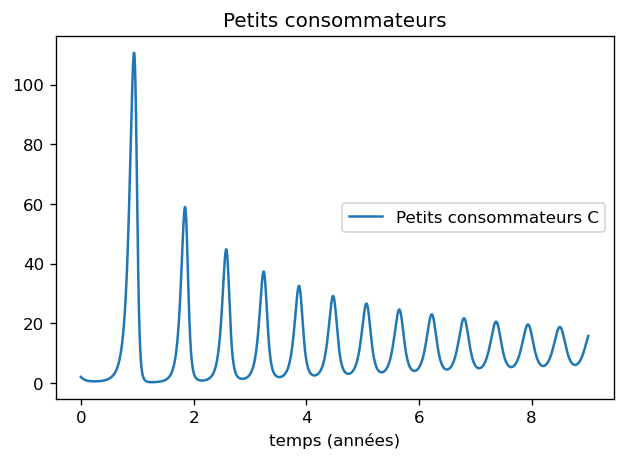

In [387]:
plt.plot(npt,npc,label = "Petits consommateurs C")
plt.title("Petits consommateurs")
plt.legend(loc="right")
plt.xlabel("temps (années)")
plt.show()

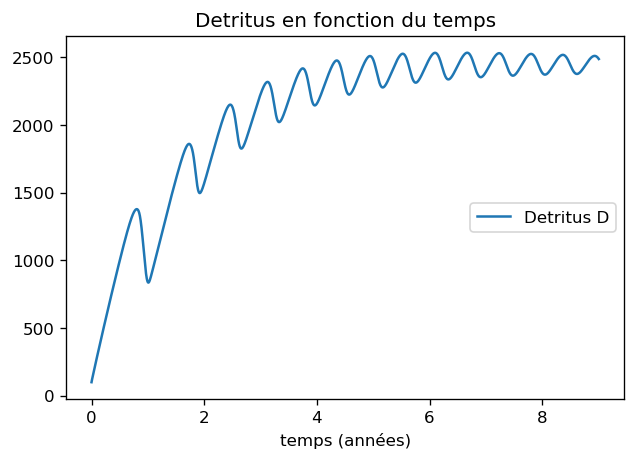

In [388]:
plt.plot(npt,npd,label = "Detritus D")
plt.title("Detritus en fonction du temps")
plt.legend(loc="right")
plt.xlabel("temps (années)")
plt.show()

**____________**

On voit donc que l'on peut étudier les évolutions de stocks, de fluxs et de production sur plusieurs années,dans ds systèmes complexes, grâce aux minimodèles qui ont été construits plus tôt.  
En suivant de façon systèmatique la méthodologie proposée, il est donc possible de modéliser un écosystème de façon fidèle.

**_____________________________________________**

## Partie III - Sources énergétiques

Jusqu'à présent, nous avons travaillé avec des sources d'énergie simples. Soit celles-ci sont constantes, soit elles suivent une courbe prédéfinie, par exemlpe une courbe d'ensoleillement évolutive au cours de la journée, avec un pic à midi, et nulle la nuit (modèles DAYP&C, OPENAQ).

Nous souhaitons dans cette partie, pouvoir exploiter des données réelles, récoltées par des stations météo. Ces données sont aléatoires mais suivent des tendances.

Les données auxquelles nous avons accès sont les suivantes :

* 37 stations MétéoFrance sur l'île de la Réunion
* 3 stations MétéoFrance en métropole : Montpellier, Brest, Annecy
* Données journalières
* Période de 10 ans
* Du 01/01/2011 au 31/12/2020
* Pluie quotidienne
* Température moyenne quotidienne
* Humidité moyenne quotidienne
* Rayonnement global moyen quotidien

Les données à exploiter correspondent à 10 ans de données quotidiennes. Dans le document *Exploitation des données*, ces données sont transformées en une année type, sous la forme d'une Timeseries pandas.

Par exemple, le traitement des données de rayonnement global sur la station de Gillot Aéroport (La Réunion) nous donne le résultat suivant :
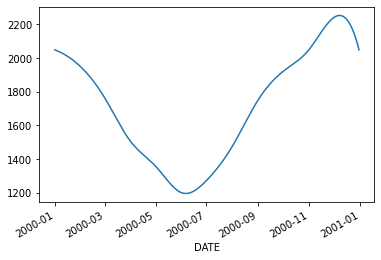  

En abcisse, le jour de l'année ( on s'est à l'année 2000 de façon arbitraire).  
En ordonnée, l'intensité du rayonnement (en W/m2).

In [389]:
#importation des données traitées
D = pd.read_csv("../data/GillotAeroport_GLOT.csv")
D

DATE         GLOT
0    2000-01-01  2048.229391
1    2000-01-02  2046.303564
2    2000-01-03  2044.300250
3    2000-01-04  2042.218488
4    2000-01-05  2040.057315
..          ...          ...
360  2000-12-27  2117.571258
361  2000-12-28  2101.795958
362  2000-12-29  2084.995331
363  2000-12-30  2067.147200
364  2000-12-31  2048.229391

[365 rows x 2 columns]

On souhaite donc utiliser ce modèles de sources d'énergie (rayonnement, précipitation etc..) comme nouvelles entrées de nos modèles précédemment élaborés.  
Le nom des modèles sera incrémenté d'un "*v*" pour indiquer la variabilité de la source au cours de l'année.

**Exemple avec le modèle NETPROD**

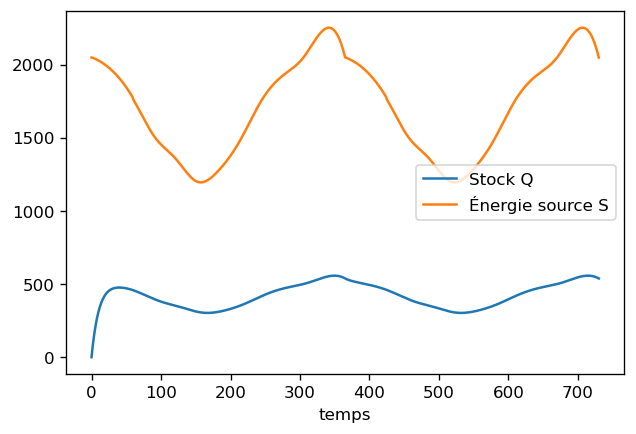

In [390]:
#Définition de la plage temporelle
T0 = 0
T = T0
dT = 1
Tf = 365*2

#Définition des conditions intiales
Q0 = .1 #stock initial
Q = Q0

#Définition de l'énergie source
an = D #donnée en csv importée
S0 = an.iloc[0][1]
S = S0

#Définition des constantes
K1 = .0225
K2 = .09

#Définition des matrices qui vont stocker les valeurs au cours de la boucle de calcul, afin de pouvoir tracer les graphes.
npt = np.array([T]) #temps
npq = np.array([Q]) #stock
nps = np.array([S]) #énergie source

#Boucle de calcul

while T < Tf :
    #on doit s'assurer que T est bien compris dans les limites de l'année type. Sinon, on enlève 365 pour chaque année écoulée
    n = int(T/365) #n est le nombre de fois que l'on a fait une année complète
    S = an.iloc[T-(n*365)][1]
    P = K1*S #production
    C = K2*Q #consommation
    dQ = P - C
    Q += dQ
    T += dT 
    #on incrémente les nouvelles valeurs dans les matrices
    npt = np.append(npt,T)
    npq = np.append(npq,Q)
    nps = np.append(nps,S)
    

#Tracé des graphes
plt.plot(npt,npq,label = "Stock Q")
plt.plot(npt,nps,label = "Énergie source S")
plt.legend(loc="right")
plt.xlabel("temps")
plt.show()

On observe que le stock subit les variations de rayonnement entrant.

**_________________**

On peut de même exploiter les autres données météorologiques de façon analogue.

**_____________**

## Partie IV - Action humaine

L'objectif du projet est, on le rappelle, de pouvoir dans un premier temps modéliser un écosystèmes avec ses mltiples **ressources** et ses multiples **fluxs**, afin de pouvoir, dans un second temps, étudier la façon dont il est possible de venir interagir avec cet écosystème de façon durable.  
Pour étudier cela, nous allons tenter de modéliser différents actions que l'homme peut mener sur cet écosystème. nous regarderons notamment le comportement du système dans le cas où vient réaliser un **prélèvement** dans les stocks disponibles.

### IV.I Prélèvement discret

*Note : un prélèvement ressembe en termes de modélisation au minimodèle Pulse&Destruct*

Pour modéliser un prélèvement, on indique que lorsque le stock Q dépasse une certaine valeur Qp, on lui retire immédiatement une certaine quantité p.  
Cela va se traduire par les lignes de code suivantes :  
*if Q > Qp :*  
        *Q -= p*

**Exemple dans le cas d'un stock simple : modèle NETPROD** :

In [391]:
#Définition de la plage temporelle
T0 = 0
T = T0
dT = 1
Tf = 365

In [392]:
#Définition des conditions intiales
Q0 = .1 #stock initial
Q = Q0
S0 = 10 #énergie source initale
S = S0

#Définition des constantes
K1 = .0225
K2 = .09

In [393]:
#Définition des valeurs de prélèvement
Qp = 2.4999 #valeur à laquelle on effectue un prélèvement
pr = .5 #quantité prélevée

In [394]:
#Définition des matrices qui vont stocker les valeurs au cours de la boucle de calcul, afin de pouvoir tracer les graphes.
npt = np.array([T]) #temps
npq = np.array([Q]) #stock

In [395]:
#Boucle de calcul

while T < Tf :
    P = K1*S #production
    C = K2*Q #consommation
    dQ = P - C
    Q += dQ
    T += dT 
    #prélèvement
    if Q > Qp :
        Q -= pr
    #on incrémente les nouvelles valeurs dans les matrices
    npt = np.append(npt,T)
    npq = np.append(npq,Q)    

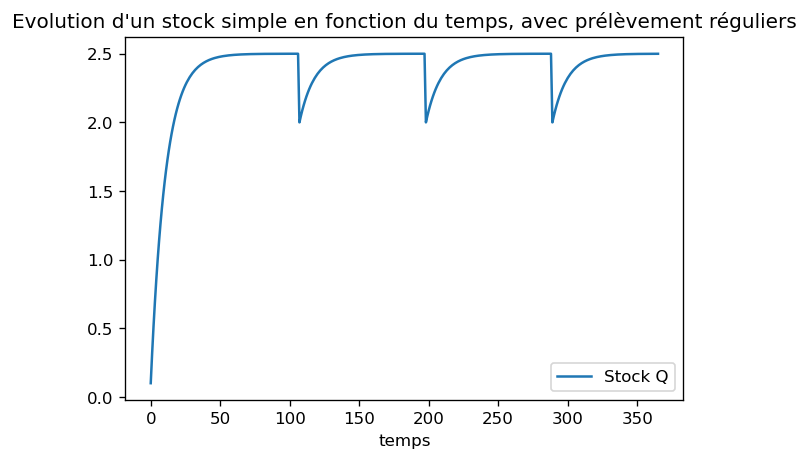

In [396]:
#Tracé des graphes
plt.plot(npt,npq,label = "Stock Q")
plt.legend(loc="lower right")
plt.xlabel("temps")
plt.title("Evolution d'un stock simple en fonction du temps, avec prélèvement réguliers")
plt.show()

On visualise bien les prélèvements dans les stocks. Les conditions de prélèvement permettent de maintenir la durabilité du stock, qui se "re-remplit" de lui-même (normal avec le modèle NETPROD).

**_____________________**

### IV.I Prélèvement continu

Du point de vue de la simulation, un prélèvement continue s'assimile à une perte au sein du stock. On retrouve donc les équations et les comportements que l'on a déjà pu observer dans certains modèles précédents.

**_____________________**

## Partie V - Étude émergétique

L'objectif de cette partie est de convertir les quantités et les grandeurs obtenues en termes énergétiques et émergétiques. On souhaite ainsi pouvoir savoir quelles quantités d'émergie sont stockées dans les réservoirs, quelles quantités sont prélevées pour utilisation par les humains, etc...  
On veut également dans un second temps évaluer certains indicateurs utiles de chaque modélisation :  
**EYR** : Emergy Yield Ratio  
**ELR** : Environmental Loading Ratio

### Traduction en termes énergétiques

Dans la littérature, et notamment dans les ouvrages d'Odum, on retrouve de nombreux outils : des grandeurs déjà estimmées sur lesquelles ont peut se baser pour évaluer l'intensité de flux, l'émergie par unité de masse de différents éléments, etc...  
On retrouve également dans la littérature, des grilles de lecture et de calcul qui nous permettent également d'évaluer des quantités de stocks, des intensités de fluxs, etc.

Ces données ont été réunies par mes soins dans un document Excel : on y retrouve des émergies types, des transformités...

Le but est donc de pouvoir, via ces informations, pouvoir traduire les modèles, qui jusqu'à présents ne comptait pas nécessairement en termes d'émergie.  
Nous pourrons grâce à cela pouvoir réaliser des comparaisons intéressantes et évaluer des indicateurs.

L'énergie, l'émergie et la transformité sont 3 grandeurs reliées par l'équation :  

$transformity =\frac{emergy}{energy}$

Avoir 2 grandeurs permet donc de déterminer la troisième. Selon les situations, on aura en notre connaissance l'énergie, l'émergie ou la transformité, et l'on pourra ainsi calculer les valeurs manquantes.

**Exemple dans le cas d'un stock simple**

On part ici du modèle NETROD, qui décrit l'évolution d'un stock simple, sous l'effet d'une alimentation constante, et d'une perte proportionnelle au stock.  
Dans cet exemple, on attribue aux stocks et aux fluxs de valeurs arbitraires d'énergie, de transformité et donc d'émergie.  
Par ailleurs, on assimile le stock Q à la quantité d'énergie qu'il contient.

INTEGRER IMAGES (*p. 9 de EMERGY ACCOUNTING*)

In [397]:
#Définition de la plage temporelle
T0 = 0
T = T0
dT = 1
Tf = 365*5

In [398]:
#Définition des conditions intiales
Q0 = .001 #stock initial, donc par analogie, énergie initale contenue dans le stock
Q = Q0
S0 = 45 #énergie source initale
S = S0

#Définition des constantes
K0 = .8
K1 = .01
K2 = .002
K3 = K1 - K2
K4 = .04

In [399]:
#énergie et émergie
Trs = 1 #transformité de la source (ici solaire)
Em0 = .001 #émergie du stock
Em = Em0

In [400]:
#Définition des matrices qui vont stocker les valeurs au cours de la boucle de calcul, afin de pouvoir tracer les graphes.
npt = np.array([T]) #temps
npq = np.array([Q]) #énergie du stock
nps = np.array([S]) #énergie source
npem = np.array([Em]) #émergie du stock

In [401]:
#Boucle de calcul

while T < Tf : 
    #R = (npj[-1])/(1 + K0*Q) #portion de l'énergie source utilisée
    P = K0*S #production
    C = K1*Q + K2*Q #consommation
    dQ = P - C
    Q += dQ
    T += dT
    Trq=Em/Q #transformité du stock Q --> émergie du stock divisé par son énergie
    if dQ > 0.05*Q/100 : 
        #Cas où la courbe est croissante : le stock augmente. 
        #on n'arrive jamais a une valeur stable (dQ=0). On dit alors que la courbe ne croit ni ne décroit si |dQ| < 0.05% de Q
        dEm = Trs * S - Trq*K2*Q
    if abs(dQ) <= 0.05*Q/100 :
        #Cas où la courbe est plate : le stock n'évolue plus.
        dEm = 0
    if dQ < -0.05*Q/100 :
        #Cas où la courbe est décroissante : le stock diminue.
        dEm = Trq * dQ
    Em += dEm
    npt = np.append(npt,T)
    npq = np.append(npq,Q)
    nps = np.append(nps,S)
    npem = np.append(npem,Em)    

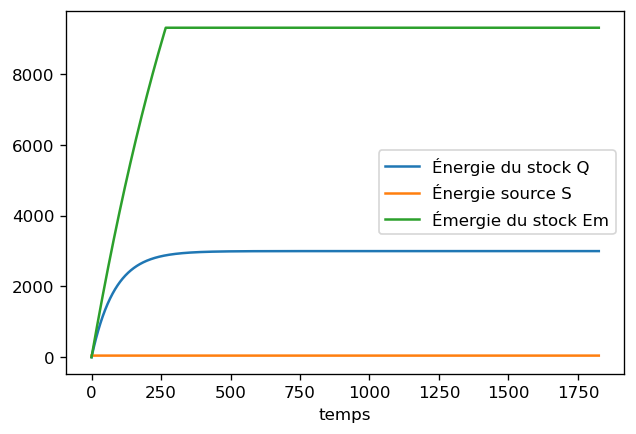

In [402]:
#Tracé des graphes
plt.plot(npt,npq,label = "Énergie du stock Q")
plt.plot(npt,nps,label = "Énergie source S")
plt.plot(npt,npem,label = "Émergie du stock Em")
plt.legend(loc="right")
plt.xlabel("temps")
plt.show()

Explications des équations :  
- l'énergie qui part sur le chemin K2.Q est trasnférée pour avoir une utilisation autre part. Elle porte donc une émergie TrQ.K2.Q
- l'énergie qui part dans le puit de chaleur, ou dans la dépréciation de matériaux, sur le chemin K1.Q, d'après la seconde loi de thermodynamique, est "perdue". Elle ne porte donc aucune émergie.
- quand Q croît (cas 1) : la variation d'émergie est l'émergie reçue par la source (Trs.S) plus celle qui est transférée pour utilisation Trq.K2.Q
- quand Q est stable (cas 2), son émergie est constante. (les entrées et les sorties sont constantes)
- quand Q décroît  (cas 3), sa variation d'émergie vaut sa variation d'énergie (donc négative) $\times$ sa transformité : Trq.dQ

Remarques :  
- l'énergie perdue (perte de chaleur etc) par un stock n'est pas en mesure d'effectuer un travail : elle a par définition une émergie nulle.
- quand le stock reçoit de l'énergie, son émergie augmente également.
- quand un stock d'énergie augmente, sa transfomité aussi. Cela traduit le fait que l'émergie utile pour développer la croissance du stock s'accumule dans le stock.
- la transfomité augmente, cela signifie que l'émergie augmente plus vite que l'énergie.
- quand le stock d'énergie n'augmente plus, son émergie non plus.
- quand le stock d'énergie diminue, son émergie stockée aussi.
- quand un stock d'énergie augmente

On peut également tracer l'évolution de la transfomité du stock.

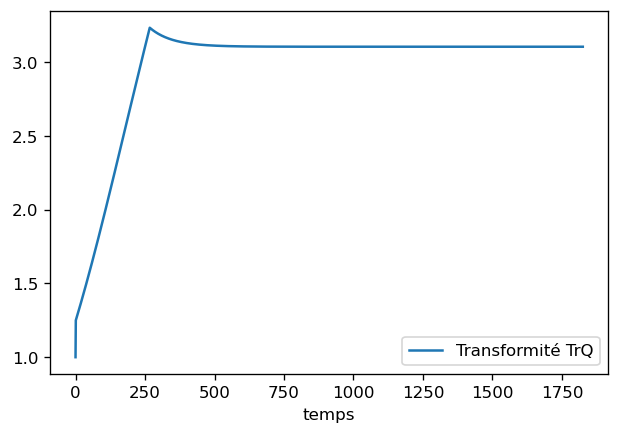

In [403]:
nptrq = npem / npq
plt.plot(npt,nptrq,label = "Transformité TrQ")
plt.legend(loc="lower right")
plt.xlabel("temps")
plt.show()

On constate comme attendu que la transformité croît avec le stock, puis est stable quand la croissance est terminée.

**--------**

**--------**

Ce premier code permet d'étudier l'évolution d'un stock, noté **Q**, qui croit selon l'action combinée d'une source **J** à laquellle on peut donner plusieurs formes, et d'une action autocatalytique. On étudie l'émergie du stock.

401
401
401
401


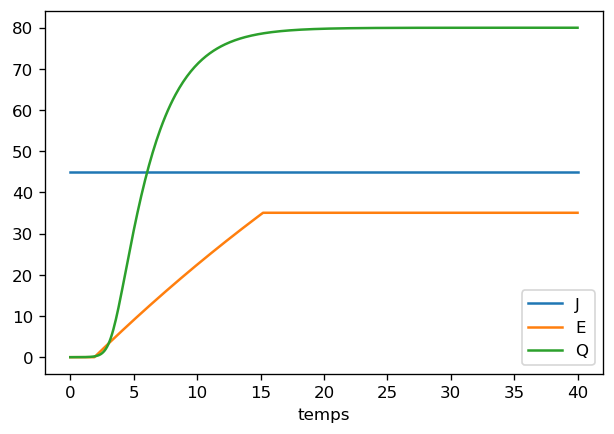

In [404]:
# Définition des constantes

K0 = .1
K1 = .01
K2 = .002
K3 = K1 - K2
K4 = .04
Q = .001
T = 0
dT = .1
Tf = 40

#Définition des matrices utilisées pour tracer les graphes

npt=np.array([T])
npq=np.array([Q])

#Définition de J, l'apport énergétique.

l = int((Tf-T)/dT)+1 #Nombre d'instants T étudiés
# J = input("Rayonnement solaire: ")
#npj = np.arange(start=T,stop=Tf+dT,step=dT)
npj = np.full(shape=l,fill_value=45)
#npj = 45*abs(np.sin(np.arange(start=T,stop=Tf+dT,step=dT)))
Trj = 1 #transformité solaire

#Pour l'étude émergétique, on va utiliser la matrice npem, qui va stocker les valeurs prises 
#par l'émergie contenue dans le stock

E = 1
npem = np.array([E])

#Calcul de la boucle

while T < Tf :
    R = (npj[-1])/(1 + K0*Q)
    dQ = K3*Q*R - K4*Q
    Q += dQ
    T += dT
    npt=np.append(npt,T)
    npq=np.append(npq,Q)
    Trq=E/Q #transformité du stock Q
    if dQ > 0.05 : #on n'arrive jamais a une valeur stable (dQ=0). On dit que la courbe ne croit ni ne décroit si |dQ| < 0.05
        dE = Trj * npj[-1] - Trq*K2*Q
    if abs(dQ) <= 0.05 :
        dE = 0
    if dQ < -0.05 :
        dE = Trq * dQ
    E += dE
    npem=np.append(npem,E)
    
    

#Vérification que les matrices sont toutes de la même taille l
print(np.size(npem))
print(np.size(npt))
print(np.size(npq))
print(np.size(npj))


#Tracé des graphiques

npem = 80*npem/12000
plt.plot(npt,npj,label = "J")
plt.plot(npt,npem,label = "E")
plt.plot(npt,npq,label = "Q")
plt.legend(loc="lower right")
plt.xlabel("temps")
plt.show()

Ici, on simule l'effet d'un **prélèvement**. Dès que le stock atteint une certaine valeur, on le diminue d'un coup d'une certaine quantité.

301
301
301
301


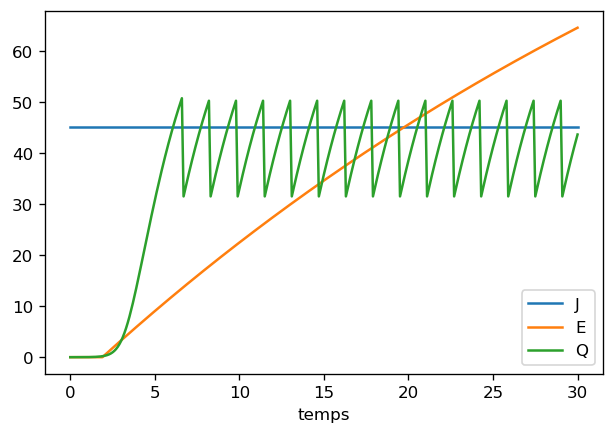

In [405]:
# Définition des constantes

K0 = .1
K1 = .01
K2 = .002
K3 = K1 - K2
K4 = .04
Q = .001
T = 0
dT = .1
Tf = 30

#Définition des matrices utilisées pour tracer les graphes

npt=np.array([T])
npq=np.array([Q])

#Définition de J, l'apport énergétique.

l = int((Tf-T)/dT)+1 #Nombre d'instants T étudiés
# J = input("Rayonnement solaire: ")
#npj = np.arange(start=T,stop=Tf+dT,step=dT)
npj = np.full(shape=l,fill_value=45)
#npj = 45*abs(np.sin(np.arange(start=T,stop=Tf+dT,step=dT)))
Trj = 1 #transformité solaire

#Pour l'étude émergétique, on va utiliser la matrice npem, qui va stocker les valeurs prises 
#par l'émergie contenue dans le stock

E = 1
npem = np.array([E])

#Calcul de la boucle

while T < Tf :
    R = (npj[-1])/(1 + K0*Q)
    dQ = K3*Q*R - K4*Q
    Q += dQ
    T += dT
    npt=np.append(npt,T)
    npq=np.append(npq,Q)
    Trq=E/Q #transformité du stock Q
    if dQ > 0.05 : #on n'arrive jamais a une valeur stable (dQ=0). On dit que la courbe ne croit ni ne décroit si |dQ| < 0.05
        dE = Trj * npj[-1] - Trq*K2*Q
    if abs(dQ) <= 0.05 :
        dE = 0
    if dQ < -0.05 :
        dE = Trq * dQ
    E += dE
    npem=np.append(npem,E)
    #Prélèvement
    if Q > 50 :
        Q = 30
    
    

#Vérification que les matrices sont toutes de la même taille l
print(np.size(npem))
print(np.size(npt))
print(np.size(npq))
print(np.size(npj))


#Tracé des graphiques

npem = 80*npem/12000
plt.plot(npt,npj,label = "J")
plt.plot(npt,npem,label = "E")
plt.plot(npt,npq,label = "Q")
plt.legend(loc="lower right")
plt.xlabel("temps")
plt.show()